# Digits Recognition with sklearn data set

# 1.KNN

## 1.1 Data Set

We work on MNIST data set from sklearn data sets , also you can find it in this link:
<br>
http://yann.lecun.com/exdb/mnist/

Import these packages:

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
digits = datasets.load_digits()

A Bunch is similar to a dictionary

In [2]:
print(type(digits))

<class 'sklearn.utils.Bunch'>


In [3]:
print(digits.keys())

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


In [4]:
print(type(digits.data))
# or print(type(digits['data']))
print(type(digits.target))
print(digits.data.shape)
print(digits.target.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(1797, 64)
(1797,)


so ,it seems to have 1797 training examples

In [5]:
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

(1797, 8, 8)


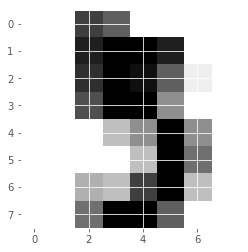

In [6]:
print(digits.images.shape)
# Display digit 5
plt.imshow(digits.images[5], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

## 1.2 Exploratory Data Analysis (EDA)

In [7]:
X=digits.data
Y=digits.target

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1,stratify=Y)

## 1.3 Classification with KNN
### 1.3.1 Training model

In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
#training
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

### 1.3.2 Testing(predicting)

In [10]:
prediction=knn.predict(X_test)
print(prediction)

[1 3 7 0 4 3 6 7 1 1 9 6 4 9 3 7 9 8 5 3 5 4 2 8 2 0 7 2 9 7 2 9 6 7 1 6 9
 3 1 9 5 5 5 7 5 4 6 9 5 6 8 4 4 9 6 1 2 1 3 6 7 7 5 2 3 2 9 4 8 5 0 9 9 1
 6 4 4 8 1 3 3 9 5 6 0 5 8 6 7 5 7 8 4 3 3 9 7 4 5 4 7 4 3 1 8 9 6 2 8 2 8
 5 6 9 5 5 0 0 4 0 6 7 5 1 7 3 0 4 9 0 3 5 0 9 3 7 9 4 2 4 2 6 9 5 9 3 1 2
 3 2 6 3 6 2 0 7 4 4 8 8 4 3 8 3 8 0 1 7 5 6 7 5 2 6 0 7 1 0 7 2 6 2 0 0 7
 1 8 0 6 3 0 0 7 5 5 3 9 0 0 5 3 7 9 5 3 9 9 8 6 1 9 0 2 6 5 6 0 9 7 8 0 8
 3 0 6 9 5 3 3 5 4 4 3 9 8 8 2 2 7 8 8 6 1 0 1 2 8 4 1 9 6 5 9 6 8 4 9 0 7
 5 3 1 1 6 9 7 5 6 2 7 4 4 4 6 9 2 4 0 7 5 7 8 1 6 9 2 7 5 2 5 0 2 0 7 1 1
 7 2 2 6 3 3 1 6 1 2 3 5 8 1 1 2 2 1 8 6 3 8 8 6 8 0 2 9 4 6 1 7 3 8 4 4 1
 4 1 1 7 5 7 6 1 9 7 1 8 1 2 5 5 6 9 3 8 3 1 0 5 3 3 8 6 5 4 5 6 8 9 0 3 0
 0 2 2 3 5 6 0 8 0 9 1 7 4 6 6 3 6 1 1 4 3 6 0 8 8 0 0 8 6 0 1 9 9 2 9 4 3
 2 8 8 7 7 5 0 7 3 4 7 2 0 0 8 1 5 2 7 4 9 0 9 1 1 3 7 0 4 2 4 4 8 7 6 9 1
 5 9 7 0 4 2 3 7 4 2 0 9 1 0 2 7 1 5 7 4 5 5 7 8 3 8 4 1 0 0 9 1 9 2 4 4 2
 7 8 3 0 4 2 3 5 9 1 3 1 

### 1.3.3 Model performance

In [11]:
knn.score(X_test,Y_test)

0.9851851851851852

## 1.4 overfitting and underfitting

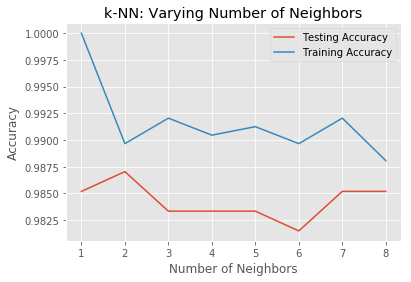

In [12]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn=KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train,Y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train,Y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test,Y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

# 2.Decision Trees

## 2.1 Training

In [20]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
dt = dt.fit(X_train, Y_train)
dt.score(X_train, Y_train)

1.0

## 2.2 Predicting

In [21]:
dt.predict(X_test)
dt.score(X_test,Y_test)

0.8388888888888889

# 3.Linear Support Vector Classification

In [22]:
from sklearn.svm import LinearSVC
lvc = LinearSVC(random_state=0, tol=1e-5)
lvc.fit(X_train, Y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=1e-05, verbose=0)

In [23]:
lvc.score(X_train,Y_train)

0.9936356404136834

In [25]:
lvc.predict(X_test)
lvc.score(X_test,Y_test)

0.95

# 4.Naive Bayes

## 4.1 Gaussian Naive Bayes

In [27]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

GaussianNB(priors=None)

In [28]:
gnb.score(X_train,Y_train)

0.843277645186953

In [29]:
gnb.predict(X_test)
gnb.score(X_test,Y_test)

0.8314814814814815

# 5.Decision Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100, max_depth=10,random_state=0)
rfc.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [52]:
rfc.score(X_train,Y_train)

1.0

In [53]:
rfc.predict(X_test)
rfc.score(X_test,Y_test)

0.9685185185185186

# 6. Neural Networks

## 6.1 MLP
2 layers are used.

Input data normalization
<br>
https://scikit-learn.org/stable/modules/preprocessing.html

In [119]:
from sklearn import preprocessing
normalizer = preprocessing.Normalizer().fit(X_train)
X_train_norm = normalizer.transform(X_train) 
X_test_norm = normalizer.transform(X_test)

In [184]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(activation='relu',solver='adam', alpha=0.0001,hidden_layer_sizes=(350),max_iter=300)
mlp.fit(X_train_norm,Y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=350, learning_rate='constant',
       learning_rate_init=0.001, max_iter=300, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [185]:
mlp.score(X_train,Y_train)

0.9952267303102625

In [186]:
mlp.predict(X_test)
mlp.score(X_test,Y_test)

0.9648148148148148

In [144]:
mlp.out_activation_

'softmax'

## 6.2 CNN with Keras

In [187]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

Using TensorFlow backend.
